<a href="https://colab.research.google.com/github/tktkbohshi/m1_study_nlp100practices/blob/main/section07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第7章 単語ベクトル  
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

## 始める前に今回の方針  
- **ライブラリを多用して楽をする**．  
- 今回使用するライブラリ  
> gensim (トピックモデルのライブラリ、単語ベクトル周りに使用)  
> sci-kit learn (クラスタリング関係, 評価に使用)  
> scipy（評価に使用）  

## 60: 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [3]:
# KeyedVectors = word vectorそのものを扱うためのクラス
from gensim.models import KeyedVectors

In [12]:
# loading the pre-trained model
MODEL_PATH = "data/GoogleNews-vectors-negative300.bin" # ダウンロード先URLかライブラリ側で用意されてるモデル名でも可
model = KeyedVectors.load_word2vec_format(MODEL_PATH, binary=True) # binaryフォーマットなのでbinary=True

In [22]:
# show a vector
print("word2vectords: ", len(model))
print("len: ", len(model['United_States']))
print(type(model['United_States']))
print(model['United_States'])

word2vecords:  3000000
len:  300
<class 'numpy.ndarray'>
[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 

## 61: 単語の類似度  
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [17]:
model.similarity('United_States', 'U.S.')

0.73107743

## 62: 類似度の高い単語10件  
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [18]:
model.most_similar('United_States', topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370987892151),
 ('United_Sates', 0.7400724291801453),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.601906955242157)]

## 63: 加法構成性によるアナロジー  
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

- アナロジー = 類比，類推

In [65]:
# Spain - Madrid + Athens
model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=1)

[('Greece', 0.6898480653762817)]

## 64: アナロジーデータでの実験  
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [72]:
import pandas as pd
from tqdm import tqdm
import numpy as np

In [54]:
PATH = "http://download.tensorflow.org/data/questions-words.txt"
dataset_analogy = pd.read_table(PATH, sep='\s+', names=["0", "1", "2", "3"])

In [61]:
# category
dataset_analogy[dataset_analogy["0"]==":"]
# 前半5つが意味的アナロジー
# 残りが文法的アナロジー

,0,1,2,3
0,:,capital-common-countries,NaN,NaN
507,:,capital-world,NaN,NaN
5032,:,currency,NaN,NaN
5899,:,city-in-state,NaN,NaN
8367,:,family,NaN,NaN
8874,:,gram1-adjective-to-adverb,NaN,NaN
9867,:,gram2-opposite,NaN,NaN
10680,:,gram3-comparative,NaN,NaN
12013,:,gram4-superlative,NaN,NaN
13136,:,gram5-present-participle,NaN,NaN


In [64]:
# contents
contents_analogy = dataset_analogy[dataset_analogy["0"]!=":"]
contents_analogy
# [1]-[0]+[2]=[3]

,0,1,2,3
1,Athens,Greece,Baghdad,Iraq
2,Athens,Greece,Bangkok,Thailand
3,Athens,Greece,Beijing,China
4,Athens,Greece,Berlin,Germany
5,Athens,Greece,Bern,Switzerland
...,...,...,...,...
19553,write,writes,talk,talks
19554,write,writes,think,thinks
19555,write,writes,vanish,vanishes
19556,write,writes,walk,walks


In [74]:
similar = []
cosine = []
isCorrect = []

for _, row in tqdm(contents_analogy.iterrows()):
    word, cos = model.most_similar(positive=[row[1], row[2]], negative=[row[0]], topn=1)[0]
    similar.append(word)
    cosine.append(cos)
    isCorrect.append(word==row[3])

19544it [1:11:49,  4.54it/s]


In [75]:
contents_analogy["estimated_word"] = similar
contents_analogy["cosine_simirality"] = cosine
contents_analogy["isCorrect"] = isCorrect
contents_analogy

/var/folders/p7/cp151t_94g33qvwjx4_yn3d00000gr/T/ipykernel_86324/1225942218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contents_analogy["estimated_word"] = similar
/var/folders/p7/cp151t_94g33qvwjx4_yn3d00000gr/T/ipykernel_86324/1225942218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contents_analogy["cosine_simirality"] = cosine
/var/folders/p7/cp151t_94g33qvwjx4_yn3d00000gr/T/ipykernel_86324/1225942218.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,0,1,2,3,estimated_word,cosine_simirality,isCorrect
1,Athens,Greece,Baghdad,Iraq,Iraqi,0.635187,False
2,Athens,Greece,Bangkok,Thailand,Thailand,0.713767,True
3,Athens,Greece,Beijing,China,China,0.723578,True
4,Athens,Greece,Berlin,Germany,Germany,0.673462,True
5,Athens,Greece,Bern,Switzerland,Switzerland,0.491975,True
...,...,...,...,...,...,...,...
19553,write,writes,talk,talks,talked,0.544719,False
19554,write,writes,think,thinks,thinks,0.617773,True
19555,write,writes,vanish,vanishes,disappear,0.600271,False
19556,write,writes,walk,walks,walks,0.553434,True


## 65: アナロジータスクでの正解率  
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [100]:
# semantic analogy
semantic = contents_analogy["isCorrect"]
print("semantic_analogy: ", round(semantic[0:8870].mean(), 3))
print("syntactic_analogy: ", round(semantic[8871:].mean(), 3))

semantic_analogy:  0.731
syntactic_analogy:  0.74


## 66: WordSimilarity-353での評価  
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

- 複数の単語のペアについて，意味の近さを基準に人手でランク付けしたデータセット

In [113]:
from scipy.stats import spearmanr

In [109]:
PATH = "data/wordsim353/combined.csv"
dataset_353 = pd.read_csv(PATH)
dataset_353

,Word 1,Word 2,Human (mean)
0,love,sex,6.77
1,tiger,cat,7.35
2,tiger,tiger,10.00
3,book,paper,7.46
4,computer,keyboard,7.62
...,...,...,...
348,shower,flood,6.03
349,weather,forecast,8.34
350,disaster,area,6.25
351,governor,office,6.34


In [112]:
# get rank
model.rank("country", "United_States")

7

In [110]:
# get similarity
sim = []
for _, row in tqdm(dataset_353.iterrows()):
    sim.append(model.similarity(row["Word 1"], row["Word 2"]))

dataset_353["cosine_similarity"] = sim

353it [00:00, 2035.46it/s]


In [111]:
# calc rank
dataset_353["rank"] = dataset_353["cosine_similarity"].rank()
dataset_353

,Word 1,Word 2,Human (mean),cosine_similarity,rank
0,love,sex,6.77,0.263938,190.0
1,tiger,cat,7.35,0.517296,316.0
2,tiger,tiger,10.00,1.000000,353.0
3,book,paper,7.46,0.363463,259.0
4,computer,keyboard,7.62,0.396392,273.0
...,...,...,...,...,...
348,shower,flood,6.03,0.129479,82.0
349,weather,forecast,8.34,0.362721,257.0
350,disaster,area,6.25,0.145228,98.0
351,governor,office,6.34,0.296636,212.0


#### スピアマンの順位相関係数
- 2変数間に、どの程度順位づけの直線関係があるかを調べる際に使う分析手段
- データが順位尺度のとき（順位しか付けられないとき）に使用すべき手法
- $\rho = 1-\frac{6\sum D^2}{N^3-N}$, $D: $対応するX とY の値の順位の差，$N: $値のペアの数

In [115]:
# calc spearman co-relation
co_relation, pvalue = spearmanr(dataset_353["Human (mean)"], dataset_353["rank"])
print("相関係数: ", co_relation)
print("p値", pvalue)　# p値: 今回のテストの結果が起こる確率，p<0.01なら偶然ではなくて必然なんじゃないかな？

相関係数:  0.7000166486272194
p値 2.86866666051422e-53


## 67: k-meansクラスタリング  
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

#### k-means クラスタリング  
- 非階層型クラスタリングの一種  
>非階層クラスター分析とは、異なる性質のものが混ざり合った集団から、互いに似た性質を持つものを集め、クラスターを作る方法の1つですが、階層クラスター分析と異なり、階層的な構造を持たず、あらかじめいくつのクラスターに分けるかを決め、決めた数の塊（排他的部分集合）にサンプルを分割する方法  
- [詳細解説](https://www.albert2005.co.jp/knowledge/data_mining/cluster/non-hierarchical_clustering)

In [133]:
from sklearn.cluster import KMeans

In [153]:
# extract countries
countries = np.array(list(set(list(contents_analogy["1"][:5030]) + list(contents_analogy["3"][:5030]))))
print(len(countries))
print(countries[0:10])

country_vector = [ model[country] for country in countries ]

116
['Burundi' 'Indonesia' 'Slovakia' 'Sweden' 'Bangladesh' 'Moldova' 'Taiwan'
 'Fiji' 'Portugal' 'Nicaragua']


In [154]:
# k-means clustering
kmeans_model = KMeans(n_clusters=5).fit(country_vector)
labels = kmeans_model.labels_

In [155]:
clustering_country = pd.DataFrame({"country": countries, "class": labels})

# 先進国
clustering_country[clustering_country["class"]==0]

,country,class
0,Burundi,0
10,Angola,0
11,Algeria,0
20,Guinea,0
22,Niger,0
23,Somalia,0
32,Uganda,0
34,Ghana,0
36,Malawi,0
37,Mauritania,0


In [156]:
# アジア
clustering_country[clustering_country["class"]==1]

,country,class
3,Sweden,1
8,Portugal,1
12,Greece,1
16,Ireland,1
18,France,1
26,Italy,1
27,England,1
31,Malta,1
39,Austria,1
55,Australia,1


In [157]:
# アフリカ
clustering_country[clustering_country["class"]==2]

,country,class
2,Slovakia,2
5,Moldova,2
14,Slovenia,2
17,Croatia,2
40,Georgia,2
42,Russia,2
48,Ukraine,2
49,Albania,2
54,Azerbaijan,2
65,Montenegro,2


In [158]:
#東欧
clustering_country[clustering_country["class"]==3]

,country,class
1,Indonesia,3
4,Bangladesh,3
13,Kyrgyzstan,3
15,Tajikistan,3
25,Libya,3
28,Oman,3
30,Jordan,3
33,Thailand,3
38,Iran,3
41,Afghanistan,3


In [159]:
# どんぱちしてるところ
clustering_country[clustering_country["class"]==4]

,country,class
6,Taiwan,4
7,Fiji,4
9,Nicaragua,4
19,Samoa,4
21,Belize,4
24,Jamaica,4
29,Venezuela,4
35,Chile,4
47,Cuba,4
50,Tuvalu,4


## 68: Ward法によるクラスタリング  
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

#### Ward法
- 階層型クラスタリングの一種  
> 最も似ている組み合わせから順番にまとまり（クラスター）にしていく方法で、途中過程が階層のように表せ、最終的に樹形図（デンドログラム）ができる．  
- [詳細解説](https://www.albert2005.co.jp/knowledge/data_mining/cluster/hierarchical_clustering)

In [160]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [161]:
# clustering (ward)
clustered = linkage(conutry_vector, method='ward')

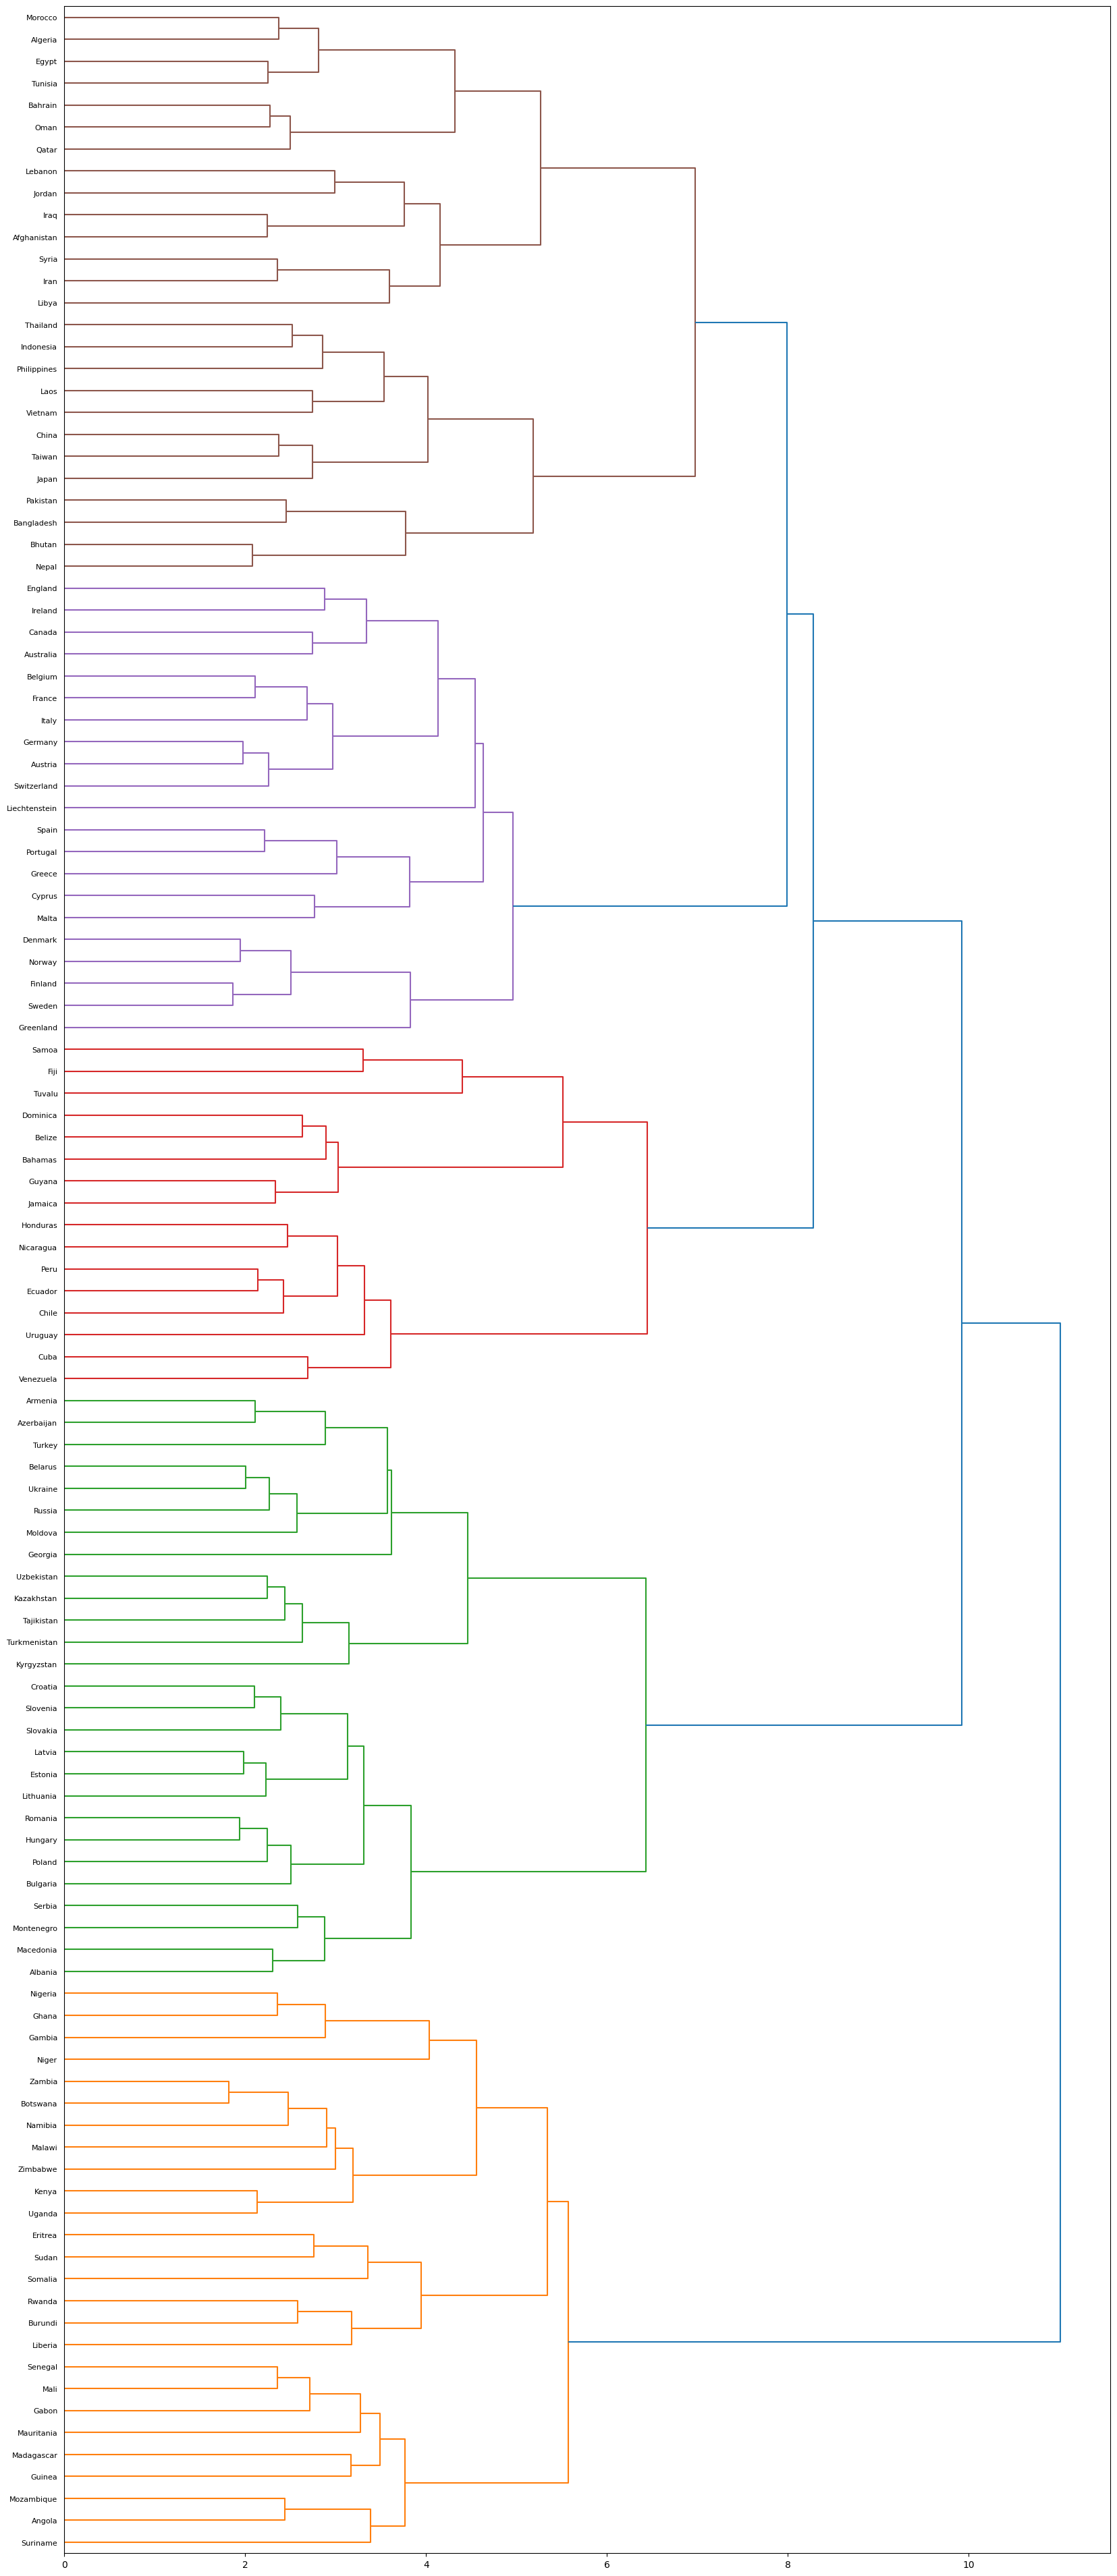

In [162]:
# show dendrogram
plt.figure(figsize=(20, 50), dpi=100)
_ = dendrogram(clustered, labels=list(countries), leaf_font_size=8, orientation='right')
plt.show()

## 69: t-SNEによる可視化  
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

#### t-SNE  
- 非線形削減のための手法 (他にはPCAなど)  
- 今回のように，単語ベクトルがカテゴリごとにちゃんと分かれているか？というのを検証したりするのに使う
- 非線形のデータにも対応できる
- メリット
> 高次元の局所的な構造を非常によく捉える  
> 大局的な構造も可能な限り捉える
- [詳細解説](https://qiita.com/g-k/items/120f1cf85ff2ceae4aba)

In [152]:
from sklearn.manifold import TSNE

In [163]:
X_reduced = TSNE(n_components=2).fit_transform(country_vector)

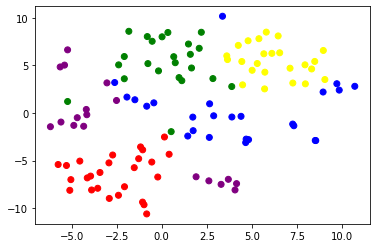

In [171]:
# color (k-means)
color_dict = {0: "red", 1: "green", 2: "yellow", 3: "blue", 4: "purple"}
color = [color_dict[label] for label in labels]
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=color)
plt.show()